# Education Analysis
# Takao Oba

The questions have been entered into this document. You will modify the document by entering your code.

Make sure you run the cell so the requested output is visible. Please download the finished document as an HTML file.

**Homework is an opportunity to practice coding and to practice problem solving. Doing exercises is where you will do most of your learning.**

**Copying someone else's solutions takes away your learning opportunities. It is also academic dishonesty.**

In [1]:
import pandas as pd

## Introduction

The data were taken from https://nces.ed.gov/programs/digest/d21/tables/dt21_104.20.asp but cleaned up for you.


## Data

This is a quick read to give you an idea of the data.  Part of the homework will be to read more carefully

In [2]:
data = pd.read_csv("tabn104.20_mod.csv")
data.describe

<bound method NDFrame.describe of      Year Gender Minimum Degree      Total  White  Black  Hispanic  Asian  \
0    1920      B    high school        NaN   22.0    6.3       NaN    NaN   
1    1940      B    high school  38.100000   41.2   12.3       NaN    NaN   
2    1950      B    high school  52.800000   56.3   23.6       NaN    NaN   
3    1960      B    high school  60.700000   63.7   38.6       NaN    NaN   
4    1970      B    high school  75.400000   77.8   58.4       NaN    NaN   
..    ...    ...            ...        ...    ...    ...       ...    ...   
245  2017      F       master's  10.500000   11.8    6.8       5.0   25.8   
246  2018      F       master's  10.700000   12.6    6.2       3.8   29.9   
247  2019      F       master's  11.200000   12.6    8.5       4.6   27.5   
248  2020      F       master's  11.700000   13.3    7.3       5.9   28.1   
249  2021      F       master's  11.704513   13.8    6.5       5.6   27.6   

     Pacific Islander  American Indian/\n

## Description of the Data

- Year: The year this row represents. There is more than one row for some of the years. They have the percent  by gender.
- Gender: "F" for female, "M" for male, or "B" for combined M/F.
- Minimum degree:  "high school", "associate's", "bachelor's", or "master's".
- Total: The total percent of students to reach at least the minimum level of educational attainment in that year.
- White / Black / Hispanic / Asian / Pacific Islander / American Indian or Alaska Native / Two or more races: The percent of students of this race to reach at least the minimum level of educational attainment in that year.

## Problem 1

Correctly read the data from the CSV file using pandas. Note that the file uses blanks represent missing data make sure all of the missing are correctly read as NaN. You do NOT need to set a datetime index or any other index for this. 

In [8]:
data = pd.read_csv("tabn104.20_mod.csv")
data.head()

,Year,Gender,Minimum Degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/\nAlaska Native,Two or more races
0,1920,B,high school,NaN,22.0,6.3,NaN,NaN,NaN,NaN,NaN
1,1940,B,high school,38.1,41.2,12.3,NaN,NaN,NaN,NaN,NaN
2,1950,B,high school,52.8,56.3,23.6,NaN,NaN,NaN,NaN,NaN
3,1960,B,high school,60.7,63.7,38.6,NaN,NaN,NaN,NaN,NaN
4,1970,B,high school,75.4,77.8,58.4,NaN,NaN,NaN,NaN,NaN


## Problem 2: compare_babs_1980

What were the percentages for women vs. men with a minimum level Bachelor's Degree in 1980? 

Please write a little function compare_babs_1980 and return the result as a DataFrame with a row for men and a row for women with the columns "Sex" and "Total".

For example, compare_babs_1980(data) should return the following (it's OK if the order of the rows or your index values are not the same)

In [48]:
def compare_babs_1980(x):
    inter_var = x[x["Minimum Degree"] == "bachelor's"]
    out = inter_var["Minimum Degree"].groupby(inter_var["Gender"]).value_counts()
    print(out)
    
compare_babs_1980(data)

Gender  Minimum Degree
B       bachelor's        26
F       bachelor's        21
M       bachelor's        21
Name: Minimum Degree, dtype: int64


In [3]:
data.iloc[[130, 210], [1,3]]

,Gender,Total
130,M,24.0
210,F,21.0


## Problem 3: top_2010s

What were the top percentage for each level of educational attainment between 2010-2020 (inclusive)? 

You should use only the rows for 'B' (both) and only the Total (not by race). Call your function top_2010s and return a Series with the top values along with their degree names.

So for example, your output should look something like:

```
high school    94.8  
associate      50.0                       
bachelor's     39.2 
master's       9.4
```

It's OK if they do not line up nicely also do not worry about ties. If you want, give priority to the most recent year.


In [50]:
def top_2010s(x):
    inter_var = x[x["Gender"] == "B"]
    out = inter_var["Total"].groupby(inter_var["Minimum Degree"]).max()
    print(out)

top_2010s(data)

Minimum Degree
associate      50.0
bachelor's     39.2
high school    94.8
master's        9.5
Name: Total, dtype: float64


## Problem 4: percent_change_bachelors

What is the percentage change of bachelor's degrees received in 2000 as compared to 2020? Write a little function that incorporates gender so a user can specify 'M', 'F', or 'B'. If  the user does not specify the gender, your function should return the percent change for 'B' by default. Name it percent_change_bachelors and return the difference as a float.

For this problem you might want to use the squeeze() function on a Series to get a single value from a Series of length 1.

In [88]:
def percent_change_bachelors(x, gender = "B"):
    inter_var_2000 = x[x["Year"] == 2000]
    inter_var_2020 = x[x["Year"] == 2020]
    
    if gender == "M":
        inter_var2_2000 = inter_var_2000[inter_var_2000["Gender"] == "M"]
        inter_var2_2020 = inter_var_2020[inter_var_2020["Gender"] == "M"]
    elif gender == "F":
        inter_var2_2000 = inter_var_2000[inter_var_2000["Gender"] == "F"]
        inter_var2_2020 = inter_var_2020[inter_var_2020["Gender"] == "F"]
    else:
        inter_var2_2000 = inter_var_2000[inter_var_2000["Gender"] == "B"]
        inter_var2_2020 = inter_var_2020[inter_var_2020["Gender"] == "B"]
        
    inter_var3_2000 = inter_var2_2000[inter_var2_2000["Minimum Degree"] == "bachelor's"]
    inter_var3_2020 = inter_var2_2020[inter_var2_2020["Minimum Degree"] == "bachelor's"]
    
    print("The percentage change of bachelor's degrees received in 2000 compared to 2020 is " + str((inter_var3_2020["Total"].squeeze()/inter_var3_2000["Total"].squeeze())*100) + "%.")
  

percent_change_bachelors(data, gender = "M")

The percentage change of bachelor's degrees received in 2000 compared to 2020 is 124.37275985663084%.


## Problem 5: Make a line graph

Plot the total percentages of bachelor's degree as minimal completion with a line chart over the years availablee.

You should filter to rows where gender is 'B'. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Percentage Earning Bachelor's".  Make sure your graph displays in your HTML submission



Text(0, 0.5, 'Percentage')

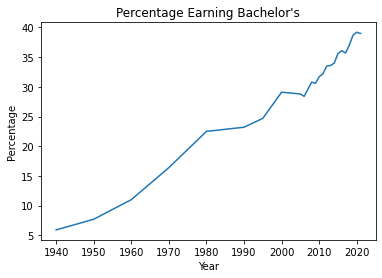

In [94]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors
inter_var = data[data["Gender"] == "B"]
inter_var2 = inter_var[inter_var["Minimum Degree"] == "bachelor's"]
plt.plot(inter_var2["Year"], inter_var2["Total"])
plt.title("Percentage Earning Bachelor's")
plt.xlabel("Year")
plt.ylabel("Percentage")

## Problem 6: Your choice of a custom plot

Decide how you will plot the results of how the percent of Black and Hispanic origin people with bachelor's degrees has changed between 1990 and 2010 (inclusive) with a plot of your choosing. You do not need to use every year in the dataset but should have at least the endpoints (1990, 2010).

Make sure you label your axes with descriptive names and give a title to the graphic. Make sure your graph displays in your HTML submission

Please write a few sentences telling us about your decision of graphic type.  For example, suppose you decide to use a bar chart, we would like to know your justification, like "Oh, I thought it would be easy for anyone to understand because the heights of the bars..."

/Users/takaooba/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/takaooba/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Percentage')

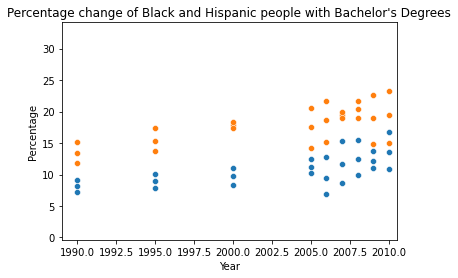

In [120]:
import seaborn as sns

inter_var = data[data["Minimum Degree"] == "bachelor's"]
plot = sns.scatterplot(inter_var["Year"], inter_var["Hispanic"])
sns.scatterplot(inter_var["Year"], inter_var["Black"])
plot.set_xlim(1989, 2010.5)
plot.set_title("Percentage change of Black and Hispanic people with Bachelor's Degrees")
plot.set_ylabel("Percentage")

I chose this plot so that the readers can vividly see the difference between the trends in the two color points. For example, the blue dots that represents the individuals with hispanic origin is significantly less for all years compared to the black people. The scatterplot clearly indicates trends in the data as well.